In [1]:
import numpy as np
import importlib
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import math
from mpl_toolkits.mplot3d import Axes3D
import pdb
import pickle
from DebugObjectModule import DebugObject


# Testing Group Velocity

## Import file conditions

In [2]:
Run_num = "000030_testing"

input_fname_1 = str(f"input.{Run_num}")
print("Using initial conditions from ", input_fname_1)
init = importlib.import_module(input_fname_1)
sim_name = init.simulation_name
shape_name = init.shape
xden = init.xdensity
yden = init.ydensity
xiden = init.xidensity
res = init.resolution
iter = init.iterations
mode = init.mode
fname = init.fname
debugmode = init.debugmode
x_c = init.x_c
y_c = init.y_c
xi_c = init.xi_c
px_0 = init.px_0
py_0 = init.py_0
pz_0 = init.pz_0
x_s = init.x_s
s1 = init.s1
s2 = init.s2

Using initial conditions from  input.000030_testing


In [3]:
file = open("./data/"+fname[:-4]+"-DEBUG.obj", 'rb') 
debug = pickle.load(file)[0]
file.close
print(debug)
print(type(debug))
print(debug.x_dat)
x_dat = debug.x_dat
y_dat = debug.y_dat
z_dat = debug.z_dat
xi_dat = debug.xi_dat
Fx_dat = debug.Fx_dat
Fy_dat = debug.Fy_dat
Fz_dat = debug.Fz_dat
px_dat = debug.px_dat
py_dat = debug.py_dat

<class 'DebugObjectModule.DebugObject'>
[[-7.         -6.99500025 -6.9900005  ... 11.62374773 11.62874744
  11.63374714]]


Here we make an array to index iterations

In [4]:
#Create array for iterations
iterations = np.arange(0,len(xi_dat[0,:]),1)
print(iterations)

dt = 0.005 #Timestep in 1/w_p

#Create array for times
time = iterations*dt
print(time)

[   0    1    2 ... 3725 3726 3727]
[0.0000e+00 5.0000e-03 1.0000e-02 ... 1.8625e+01 1.8630e+01 1.8635e+01]


## Beta Calculation

In [5]:
def Gamma(p):
        return math.sqrt(1.0 + p**2)

def Velocity(px,ptot):
    # Returns relativistic velocity from momentum
    return px / Gamma(ptot)

In [6]:
px = px_0
py = py_0
pz = pz_0

p = math.sqrt(px**2 + py**2 + pz**2)
vx = Velocity(px, p)
vz = Velocity(pz, p)
alpha = vx/vz
gamma = math.sqrt(p**2 + 1)

print(f"px = {px}")
print(f"pz = {pz}")

print(f"vx = {vx}")
print(f"vz = {vz}")
print(f"alpha = {alpha}")
print(f"gamma = {gamma}")

ZeroDivisionError: float division by zero

## Plotting

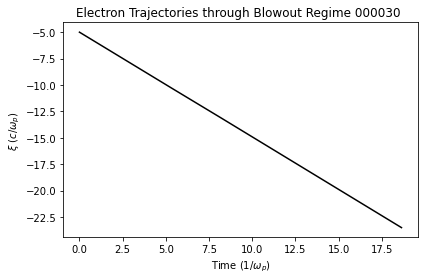

In [7]:
fig1, ax1 = plt.subplots(1)
ax1.set_xlabel(r"Time ($1/\omega_p$)")
ax1.set_ylabel(r"$\xi$ ($c/\omega_p$)")
ax1.set_title(f"Electron Trajectories through Blowout Regime {fname[0:6]} ")
ax1.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    ax1.plot(time[:4000], xi_dat[i,:4000],  'k', label='$time-Xi Trajectory') # Want vertical axis as y

fig1.tight_layout()
fig1.savefig("Force-testing_"+fname[:-4]+".png", transparent=False)

In [8]:
print(xi_dat[0,0], xi_dat[0,-1])

-5.0 -23.516604854240747


In [9]:
argmax = np.argmax(xi_dat[0,:])
print(argmax)

0


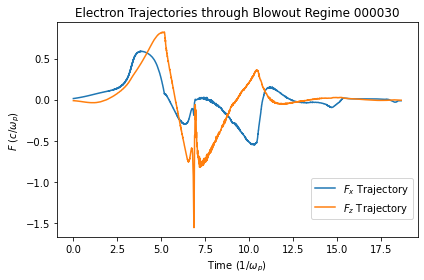

In [10]:
fig2, ax2 = plt.subplots(1)
ax2.set_xlabel(r"Time ($1/\omega_p$)")
ax2.set_ylabel(r"$F$ ($c/\omega_p$)")
ax2.set_title(f"Electron Trajectories through Blowout Regime {fname[0:6]}")
ax2.ticklabel_format(style='plain', axis='y',useOffset=False)

maximum = 4000
for i in range(0, 1):
    #ax2.plot(time[0:argmax], xi_dat[i,0:argmax],  'k', label='$Z-Xi Trajectory') # Want vertical axis as y
    ax2.plot(time[:], Fx_dat[i,:], label='$F_x$ Trajectory') # Want vertical axis as y
    ax2.plot(time[:], Fz_dat[i,:], label='$F_z$ Trajectory') # Want vertical axis as y
    
fig2.legend(bbox_to_anchor=(1, 0.3), bbox_transform=ax2.transAxes)

fig2.tight_layout()
fig2.savefig("Force-testing_"+fname[:-4]+"-02.png", transparent=False)

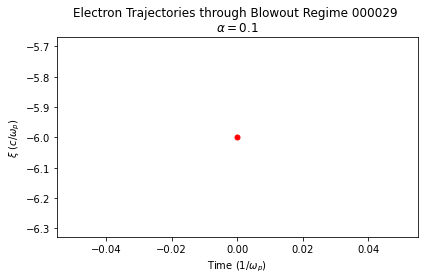

In [24]:
fig3, ax3 = plt.subplots(1)
ax3.set_xlabel(r"Time ($1/\omega_p$)")
ax3.set_ylabel(r"$\xi$ ($c/\omega_p$)")
ax3.set_title(f"Electron Trajectories through Blowout Regime {fname[0:6]} \n"+r"$\alpha=0.1$")
ax3.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    ax3.plot(time[argmax], xi_dat[i,argmax], marker='o', markersize=5, color="red")
    ax3.plot(time[0:argmax], xi_dat[i,0:argmax],  'k', label='$time-Xi Trajectory') # Want vertical axis as y
    #ax3.plot(time[0:argmax], Fz_dat[i,0:argmax],  'k', label='$Fz Trajectory') # Want vertical axis as y

fig3.tight_layout()
fig3.savefig("Group_Velocity_Test_"+fname[:-4]+"-03.png", transparent=False)

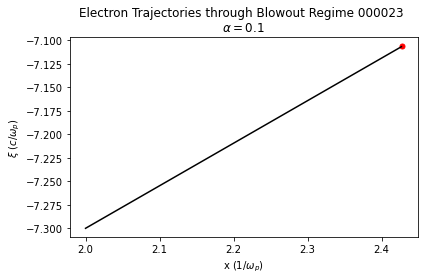

In [110]:
fig4, ax4 = plt.subplots(1)
ax4.set_xlabel(r"x ($1/\omega_p$)")
ax4.set_ylabel(r"$\xi$ ($c/\omega_p$)")
ax4.set_title(f"Electron Trajectories through Blowout Regime {fname[0:6]} \n"+r"$\alpha=0.1$")
ax4.ticklabel_format(style='plain', axis='y',useOffset=False)

for i in range(0, 1):
    ax4.plot(x_dat[i,argmax], xi_dat[i,argmax], marker='o', markersize=5, color="red")
    ax4.plot(x_dat[i,0:argmax], xi_dat[i,0:argmax],  'k', label='$time-Xi Trajectory') # Want vertical axis as y
    #ax4.plot(time[0:argmax], Fz_dat[i,0:argmax],  'k', label='$Fz Trajectory') # Want vertical axis as y

fig4.tight_layout()
fig4.savefig("Group_Velocity_Test_"+fname[:-4]+"-04.png", transparent=False)

# Calculating Slope up to argmax

In [111]:
print(f"Run: {Run_num}")
print(f"argmax = {argmax}")
print(f"xi_dat[0,argmax] = {xi_dat[0,argmax]}")

Run: 000023
argmax = 859
xi_dat[0,argmax] = -7.106567383736966


In [112]:
nu = 0.95
g = vz

t_slope = (xi_dat[0,argmax]-xi_dat[0,0])/(time[argmax]-time[0])
print(f"xi vs Time Slope = {t_slope}")
expected_t_slope = nu - g
print(f"We expected a slope of: {expected_t_slope}")

print()

x_slope = (xi_dat[0,argmax]-xi_dat[0,0])/(x_dat[0,argmax]-x_dat[0,0])
print(f"xi vs x Slope = {x_slope}")
expected_x_slope = (nu - vz)/vx
print(f"We expected a slope of: {expected_x_slope}")

xi vs Time Slope = 0.045036697616538765
We expected a slope of: -0.045036697617686694

xi vs x Slope = 0.4526134334980332
We expected a slope of: -0.45261343350967254


In [115]:
print(f"Percent error in t slopes: {(abs(expected_t_slope) - abs(t_slope))/abs(expected_t_slope):.10%}")
print(f"Percent error in x slopes: {(abs(expected_x_slope) - abs(x_slope))/abs(expected_x_slope):.10%}")

Percent error in t slopes: 0.0000000025%
Percent error in x slopes: 0.0000000026%
